In [7]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pycaret[full]



In [3]:
# check installed version
import pycaret
pycaret.__version__

'3.0.4'

DataSet- https://www.kaggle.com/datasets/venky73/spam-mails-dataset?resource=download.
 This data set helps to find spam emails. it contains two folders of spam and ham. Each folder contains emails

In [4]:
import pandas as pd
import numpy as np


In [9]:
#Linking Dataset
df = pd.read_csv('/content/drive/MyDrive/Pycaret_Assignment/spam_ham_dataset.csv')

In [11]:
df.head()


,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [12]:
#using the object base api of pycaret
#Import ClassificationExperiment and init the class

from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [14]:
# init setup on exp, our target column is diagnosis
exp.setup(df, target = 'label', session_id = 123)


,Description,Value
0,Session id,123
1,Target,label
2,Target type,Binary
3,Target mapping,"ham: 0, spam: 1"
4,Original data shape,"(5171, 4)"
5,Transformed data shape,"(5171, 4)"
6,Transformed train set shape,"(3619, 4)"
7,Transformed test set shape,"(1552, 4)"
8,Numeric features,2
9,Categorical features,1


In [15]:
# compare baseline models
best_model = exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.4480
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.5160
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.6250
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.9960
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.7470
lr,Logistic Regression,0.9997,1.0000,0.9990,1.0000,0.9995,0.9993,0.9993,1.2070
knn,K Neighbors Classifier,0.9997,1.0000,0.9990,1.0000,0.9995,0.9993,0.9993,1.2900
rf,Random Forest Classifier,0.9997,1.0000,0.9990,1.0000,0.9995,0.9993,0.9993,0.9930
ada,Ada Boost Classifier,0.9997,0.9995,0.9990,1.0000,0.9995,0.9993,0.9993,0.6700
gbc,Gradient Boosting Classifier,0.9997,1.0000,0.9990,1.0000,0.9995,0.9993,0.9993,0.8800


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [16]:
best_model

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
#evaluate_model function to analyzes the performance of a trained model on the test set
exp.evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

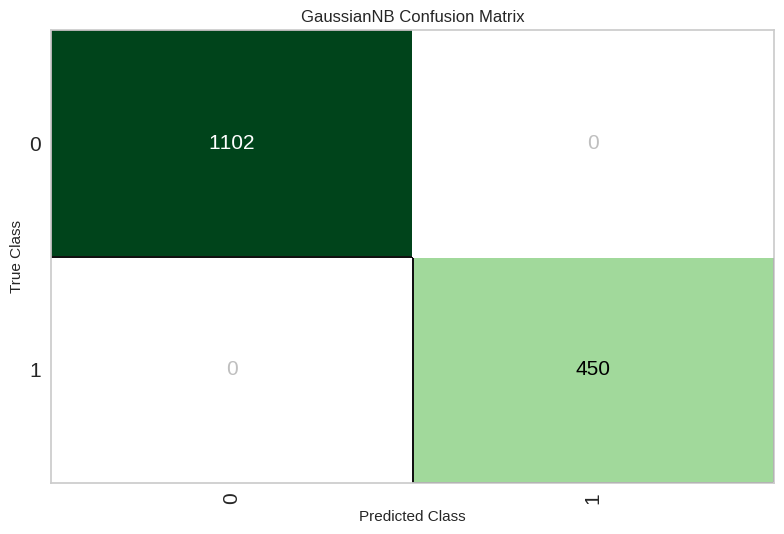

In [18]:
exp.plot_model(best_model, plot = 'confusion_matrix')

In [28]:
nb_model = exp.create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [29]:
tuned_nb_model = exp.tune_model(nb_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [30]:
! mkdir -p /content/drive/MyDrive/DM/Assignment2/PyCaretBinaryClassifiation/

In [33]:
#exporting the model as file
exp.save_model(tuned_nb_model, '/content/drive/MyDrive/Pycaret_Assignment')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Unnamed: 0', 'label_num'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missin...
                                                               drop_invariant=False,
                                                               handle_missing='return_nan',
                 

Using the saved model to make predictions further

In [34]:
#reading the saved pipeline and using it to make prediction on the entire data
from pycaret.classification import load_model,predict_model

In [37]:
model

Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Unnamed: 0', 'label_num'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missin...
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

In [39]:
#using this model to make prediction on the entire dataset
data =df.copy()
data.drop(['label'],axis=1,inplace=True)

In [40]:
model = load_model('/content/drive/MyDrive/Pycaret_Assignment')

Transformation Pipeline and Model Successfully Loaded


In [41]:
predictions = predict_model(model,data)#predicting Data

In [ ]:
predic